<a href="https://colab.research.google.com/github/brunomelorv/amazon-reviews-analysis/blob/main/clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importando arquivos necessários**

In [3]:
from google.colab import files

uploaded = files.upload()

Saving data_clothing.csv to data_clothing.csv


**2. Importação das Bibliotecas**

In [32]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
# Baixar os pacotes necessários do NLTK
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

**3. Análise exploratória de dados**

In [6]:
# Carregar o CSV para um DataFrame
df = pd.read_csv("data_clothing.csv")

# Exibir as primeiras linhas para verificar os dados
df.head()

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0


3.1 Criar ID único e tratar valores nulos

In [7]:
df["ID"] = range(1, len(df) + 1)

# Contar valores nulos por coluna
print(df.isnull().sum())

Title            3968
Review            831
Cons_rating       214
Cloth_class        16
Materials       43597
Construction    43595
Color           43596
Finishing       43601
Durability      43604
ID                  0
dtype: int64


3.2 Apagar dados ausentes

In [9]:
# Retirar todos reviews que não possuem comentários ou categoria de vestuário
df_cleaned = df.dropna(subset=["Review", "Cloth_class"])

# Verificar o novo número de valores ausentes
print(df_cleaned.isnull().sum())

Title            3186
Review              0
Cons_rating       212
Cloth_class         0
Materials       42753
Construction    42751
Color           42752
Finishing       42757
Durability      42760
ID                  0
dtype: int64


3.3 Apagar colunas desnecessárias

In [10]:
# Removendo as colunas indesejadas
df_cleaned = df_cleaned.drop(columns=["Title", "Cons_rating", "Materials", "Construction", "Color", "Finishing", "Durability"])

# Exibir as primeiras linhas para conferir
df_cleaned.head()


,Review,Cloth_class,ID
0,Absolutely wonderful - silky and sexy and comf...,Intimates,1
1,Love this dress! it's sooo pretty. i happene...,Dresses,2
2,I had such high hopes for this dress and reall...,Dresses,3
3,"I love, love, love this jumpsuit. it's fun, fl...",Pants,4
4,This shirt is very flattering to all due to th...,Blouses,5


3.4 Reordenando as colunas para colocar ID primeiro

In [11]:
df_cleaned = df_cleaned[["ID", "Review", "Cloth_class"]]

# Conferindo a nova ordem
df_cleaned.head(100)

,ID,Review,Cloth_class
0,1,Absolutely wonderful - silky and sexy and comf...,Intimates
1,2,Love this dress! it's sooo pretty. i happene...,Dresses
2,3,I had such high hopes for this dress and reall...,Dresses
3,4,"I love, love, love this jumpsuit. it's fun, fl...",Pants
4,5,This shirt is very flattering to all due to th...,Blouses
...,...,...,...
95,96,I was very excited to order this top in red xs...,Knits
96,97,I am in need of easy comfortable tops for ever...,Knits
97,98,At first i wasn't sure about it. the neckline ...,Knits
98,99,I find that this brand can be a little bit all...,Knits


**4. Aplicar a análise de sentimento**

In [13]:
# Inicializar o analisador de sentimento
sia = SentimentIntensityAnalyzer()

# Aplicar análise de sentimento às avaliações
df_cleaned["sentiment_score"] = df_cleaned["Review"].astype(str).apply(lambda x: sia.polarity_scores(x)["compound"])

# Classificar como positivo, neutro ou negativo
df_cleaned["sentiment"] = df_cleaned["sentiment_score"].apply(lambda x: "positivo" if x > 0.05 else ("negativo" if x < -0.05 else "neutro"))

# Conferir os primeiros resultados
df_cleaned.head()


,ID,Review,Cloth_class,sentiment_score,sentiment
0,1,Absolutely wonderful - silky and sexy and comf...,Intimates,0.8932,positivo
1,2,Love this dress! it's sooo pretty. i happene...,Dresses,0.9729,positivo
2,3,I had such high hopes for this dress and reall...,Dresses,0.9427,positivo
3,4,"I love, love, love this jumpsuit. it's fun, fl...",Pants,0.5727,positivo
4,5,This shirt is very flattering to all due to th...,Blouses,0.9291,positivo


**5. Analisar as Melhores e Piores Categorias**

In [14]:
# Agora, vamos calcular a média do sentimento para cada categoria de roupa (Cloth_class) e classificá-las.
# Agrupar por Cloth_class e calcular a média do sentimento
category_sentiment = df_cleaned.groupby("Cloth_class")["sentiment_score"].mean().sort_values()

# Exibir as categorias da pior para a melhor
print(category_sentiment)


Cloth_class
Blazer            0.416745
Shirts            0.421082
Suits             0.510573
Sleep             0.515562
Shorts            0.518634
Jeans             0.530479
Casual bottoms    0.541800
Pants             0.549692
Jackets           0.555563
Trend             0.605858
Sweaters          0.610158
Blouses           0.639525
Dress             0.674973
Dresses           0.696889
Outerwear         0.720601
Swim              0.722726
Lounge            0.726114
Legwear           0.729169
Fine gauge        0.729977
Intimates         0.736848
Knits             0.736927
Layering          0.739220
Skirts            0.757636
Chemises          0.812600
Name: sentiment_score, dtype: float64


**6. Criar um Gráfico das Categorias**

<ipython-input-15-a971c4360e03>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sentiment.index, y=category_sentiment.values, palette="coolwarm")


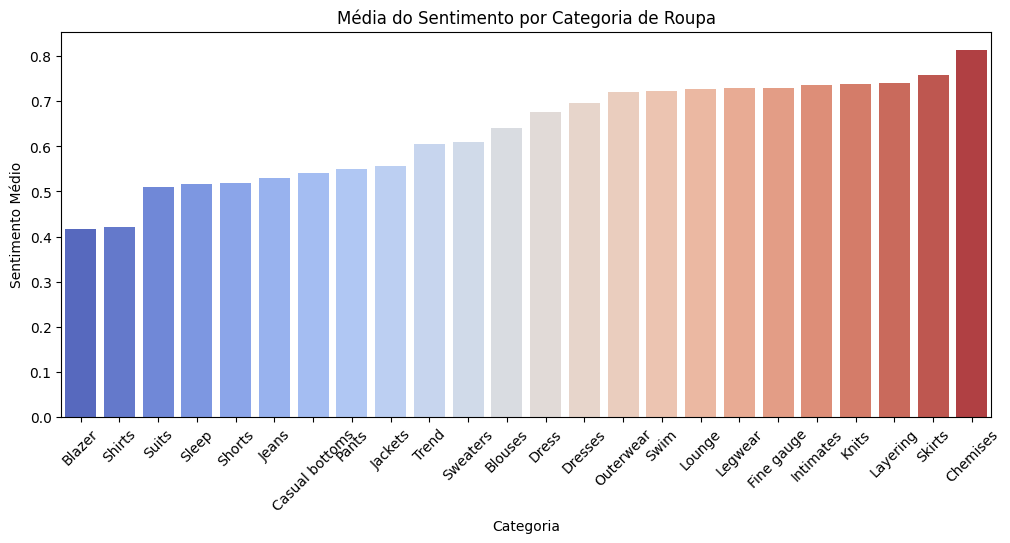

In [15]:
plt.figure(figsize=(12,5))
sns.barplot(x=category_sentiment.index, y=category_sentiment.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Média do Sentimento por Categoria de Roupa")
plt.ylabel("Sentimento Médio")
plt.xlabel("Categoria")
plt.show()


Agora que temos as melhores e piores categorias, podemos aprofundar a análise:


**Pergunta 01: As categorias com pior sentimento possuem problemas recorrentes?**

**1. Identificar as Categorias com Pior Sentimento**


*   Já calculamos a média do sentimento por categoria. Agora, vamos focar nas categorias com os menores valores de sentimento:



In [24]:
# Selecionar as 3 piores categorias com menor média de sentimento
worst_categories = df_cleaned.groupby("Cloth_class")["sentiment_score"].mean().nsmallest(5).index

print("Categorias com pior sentimento:", worst_categories)


Categorias com pior sentimento: Index(['Blazer', 'Shirts', 'Suits', 'Sleep', 'Shorts'], dtype='object', name='Cloth_class')


**2. Identificar Palavras Mais Frequentes nas Categorias Ruins**

In [25]:
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def get_top_words(df, categories, n=20):
    text = " ".join(df[df["Cloth_class"].isin(categories)]["Review"].dropna())
    words = text.lower().translate(str.maketrans("", "", string.punctuation)).split()
    words = [word for word in words if word not in stop_words]

    return Counter(words).most_common(n)

# Obter palavras mais comuns nas categorias ruins
common_words_worst = get_top_words(df_cleaned, worst_categories)
print("\n🔹 Palavras mais frequentes nas categorias com pior sentimento:")
print(common_words_worst)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



🔹 Palavras mais frequentes nas categorias com pior sentimento:
[('fit', 3217), ('size', 2264), ('great', 2040), ('like', 1959), ('shorts', 1799), ('comfortable', 1715), ('good', 1492), ('love', 1428), ('wear', 1294), ('shirt', 1267), ('material', 1258), ('nice', 1221), ('quality', 1212), ('perfect', 1169), ('well', 1154), ('would', 1069), ('small', 1040), ('bought', 1007), ('ordered', 1000), ('soft', 987)]


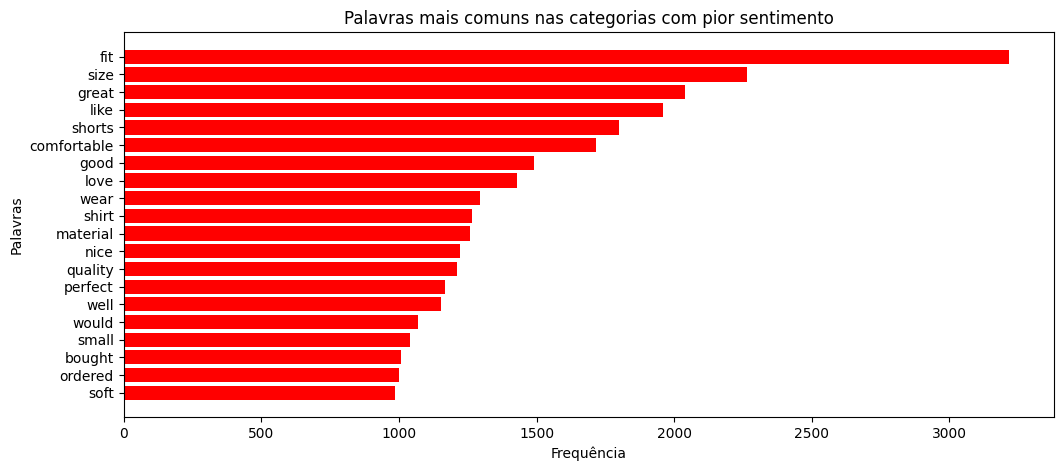

In [26]:
# Criando um gráfico de barras
# Separar palavras e frequências
words, counts = zip(*common_words_worst)

# Criar gráfico de barras
plt.figure(figsize=(12, 5))
plt.barh(words, counts, color="red")
plt.xlabel("Frequência")
plt.ylabel("Palavras")
plt.title("Palavras mais comuns nas categorias com pior sentimento")
plt.gca().invert_yaxis()
plt.show()


**3. Encontrar Palavras Negativas Associadas**

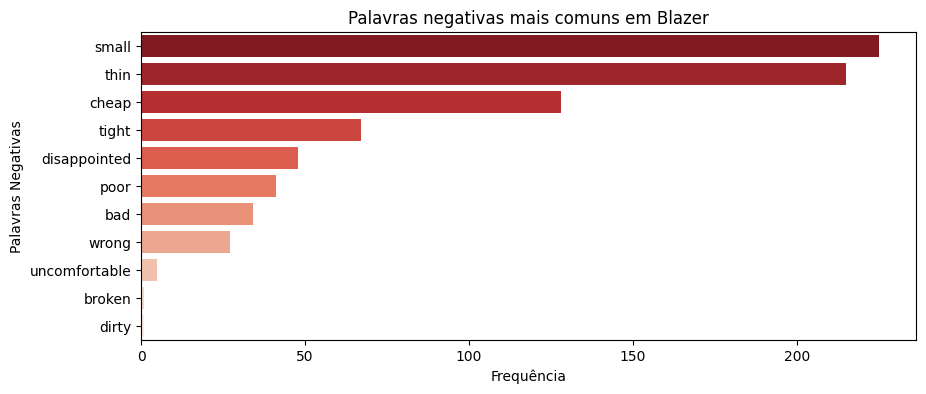

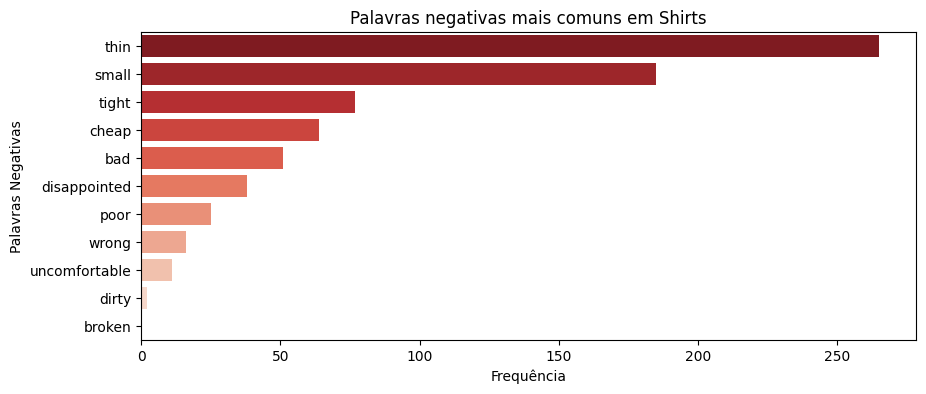

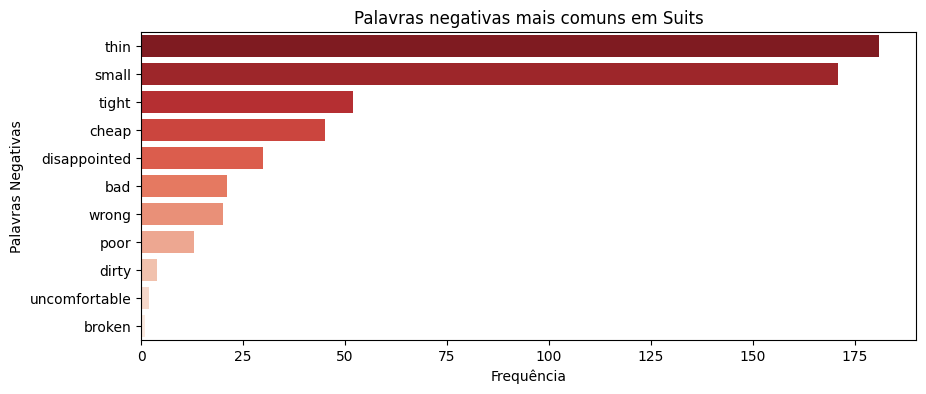

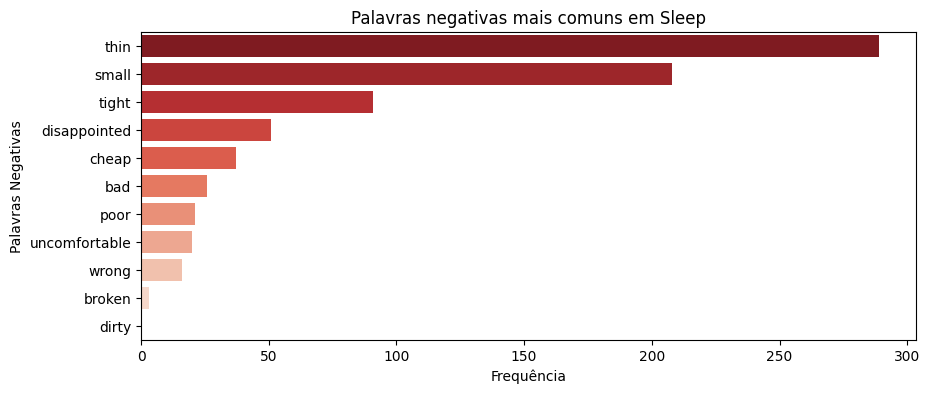

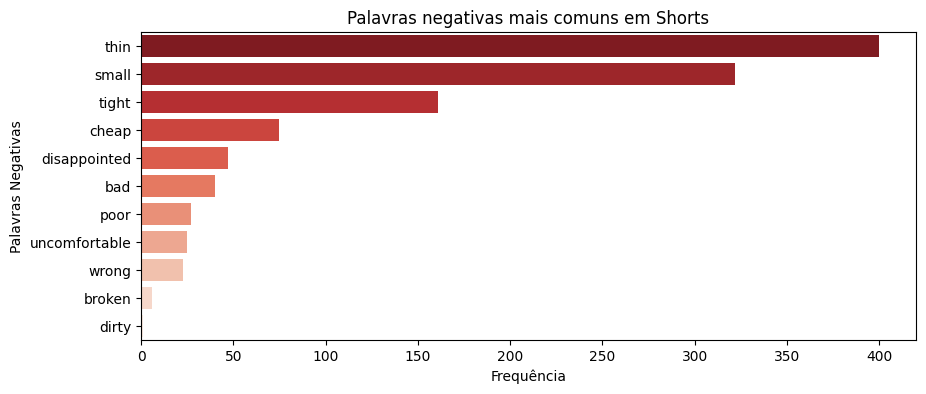

In [31]:
import seaborn as sns

# Lista de palavras negativas que queremos rastrear
negative_words = ["bad", "cheap","disappointed", "poor", "small", "thin", "uncomfortable", "tight", "broken", "wrong", "dirty"]

# Criar gráficos separados para cada categoria
for category in worst_categories:
    # Filtrar apenas as avaliações da categoria
    reviews = df_cleaned[df_cleaned["Cloth_class"] == category]["Review"].dropna()

    # Contar quantas vezes cada palavra negativa aparece
    negative_counts = {word: sum(reviews.str.contains(word, case=False, na=False)) for word in negative_words}

    # Criar DataFrame para visualização
    negative_df = pd.DataFrame(list(negative_counts.items()), columns=["Word", "Count"]).sort_values(by="Count", ascending=False)

    # Criar gráfico de barras para a categoria atual
    plt.figure(figsize=(10, 4))
    sns.barplot(x="Count", y="Word", data=negative_df, hue="Word", palette="Reds_r", legend=False)
    plt.title(f"Palavras negativas mais comuns em {category}")
    plt.xlabel("Frequência")
    plt.ylabel("Palavras Negativas")
    plt.show()